# Assignment 3: Clustering

Szymon Siemieniuk 151947

Nikita Makarevich 153989

In [1]:
import sklearn
import numpy as np
import pandas as pd

df_data = pd.read_csv('data/data.csv')

In [2]:
df_data.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [3]:
cat_features = [
    'f_07',
    'f_08',
    'f_09',
    'f_10',
    'f_11',
    'f_12',
    'f_13'
]
df_cat = df_data[cat_features]

num_features = list(set(df_data.columns) - set(cat_features) - set('id'))
df_num = df_data[num_features]

columns = num_features
columns.extend(cat_features)

df_data = df_data[columns]

In [4]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

scaler = MinMaxScaler().fit(df_num)
norm = Normalizer().fit(df_cat)

df_scaled = pd.DataFrame(scaler.transform(df_num), columns=df_num.columns)

df_scaled[df_cat.columns] = norm.transform(df_cat)

df_scaled.drop(columns=['id'], inplace=True)

In [5]:
df_scaled

,f_22,f_23,f_19,f_15,f_14,f_28,f_26,f_27,f_03,f_04,...,f_24,f_02,f_05,f_07,f_08,f_09,f_10,f_11,f_12,f_13
0,0.431881,0.656229,0.467078,0.555722,0.440618,0.557570,0.603894,0.605064,0.546940,0.431504,...,0.450930,0.562361,0.558689,0.079368,0.515889,0.555573,0.198419,0.515889,0.238103,0.238103
1,0.450616,0.608434,0.472326,0.469987,0.560252,0.306763,0.453613,0.543135,0.595238,0.335748,...,0.623499,0.562946,0.573136,0.095564,0.143346,0.286691,0.191127,0.286691,0.764510,0.430037
2,0.757268,0.570082,0.473940,0.568349,0.416930,0.238558,0.605750,0.428078,0.402646,0.540544,...,0.367093,0.358769,0.564273,0.236757,0.520865,0.236757,0.378811,0.426162,0.142054,0.520865
3,0.590711,0.433370,0.583177,0.586226,0.449681,0.516282,0.469007,0.500973,0.504429,0.576596,...,0.602681,0.519301,0.341746,0.297775,0.099258,0.645179,0.397033,0.446663,0.297775,0.198517
4,0.534534,0.405619,0.345402,0.445157,0.479984,0.356527,0.624310,0.476586,0.259276,0.494476,...,0.604864,0.459521,0.271661,0.382255,0.334473,0.238909,0.143346,0.047782,0.621164,0.525600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,0.615567,0.603631,0.486993,0.629853,0.534482,0.531120,0.410276,0.524980,0.514201,0.493436,...,0.649153,0.412625,0.513801,0.290129,0.406181,0.464207,0.290129,0.406181,0.348155,0.406181
97996,0.638793,0.516049,0.530125,0.374467,0.570686,0.551405,0.522255,0.572857,0.319744,0.486603,...,0.546457,0.552702,0.497475,0.151330,0.453990,0.100887,0.252217,0.151330,0.554877,0.605320
97997,0.400671,0.712424,0.427752,0.522359,0.342792,0.545220,0.661859,0.617652,0.317533,0.550976,...,0.606804,0.700789,0.415183,0.431331,0.485247,0.539164,0.377415,0.269582,0.215666,0.161749
97998,0.540071,0.614587,0.516531,0.467741,0.424549,0.494422,0.400851,0.462079,0.528828,0.582414,...,0.588578,0.574939,0.484191,0.048679,0.389434,0.535472,0.535472,0.146038,0.438113,0.243396


In [8]:
import cProfile, pstats

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.utils.random import sample_without_replacement

RANDOM_STATE = 420
SAMPLE_SIZE = 10000

silhouette_scores = []
bouldin_scores = []
ns_clusters = list(range(2, 11))

profile = cProfile.Profile()
profile.enable()

for n_clusters in ns_clusters:
    print(f"Computing for n_clusters: {n_clusters}")
    indices = sample_without_replacement(len(df_scaled), SAMPLE_SIZE, random_state=RANDOM_STATE)
    sampled_df_scaled = df_scaled.iloc[indices]

    kmeans = KMeans(n_clusters=n_clusters, random_state=RANDOM_STATE, n_init="auto", verbose=False)
    kmeans.fit(sampled_df_scaled)

    labels = kmeans.predict(sampled_df_scaled)
    silhouette_scores.append(silhouette_score(sampled_df_scaled, labels))
    bouldin_scores.append(davies_bouldin_score(sampled_df_scaled, labels))

profile.disable()
stats = pstats.Stats(profile).sort_stats("cumtime")
stats.print_stats()

Computing for n_clusters: 2
Computing for n_clusters: 3
Computing for n_clusters: 4
Computing for n_clusters: 5
Computing for n_clusters: 6
Computing for n_clusters: 7
Computing for n_clusters: 8
Computing for n_clusters: 9
Computing for n_clusters: 10
         534355 function calls (532096 primitive calls) in 24.198 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000   24.197   12.099 /home/nikita/miniconda3/envs/data-mining/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3472(run_code)
        2    0.000    0.000   24.197   12.099 {built-in method builtins.exec}
        1    0.001    0.001   24.197   24.197 /tmp/ipykernel_1243/3467672697.py:1(<module>)
        9    0.000    0.000   20.943    2.327 /home/nikita/miniconda3/envs/data-mining/lib/python3.11/site-packages/sklearn/metrics/cluster/_unsupervised.py:39(silhouette_score)
        9    0.001    0.000   20.942    2.327 /home/niki

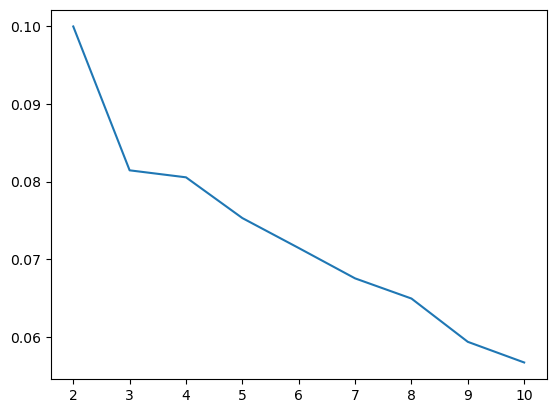

In [11]:
import matplotlib.pyplot as plt

plt.plot(ns_clusters, silhouette_scores)